## Exploratory Data Analysis: merged datasets (weather + alarms)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime     
from dateutil.relativedelta import relativedelta  
import math

### Read .csv file and write it in a dataframe named *merged_df*

In [2]:
merged_df = pd.read_csv('merged_dataset.csv', delimiter = ';')
merged_df.sample(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,text_stemm,text_lemm,keywords
76326,"Київ, Україна",2022-06-20,1655672400,32.4,19.5,26.1,10.9,40.9,0.000,0.00,...,2022-06-20 16:00:00,2022-06-20 18:00:00,2022-06-20,1.655755e+09,1.655762e+09,2022-06-20 16:00:00,1.655755e+09,karolina hird kateryna stepanenko mason clark...,karolina hird kateryna stepanenko mason clark...,"{'trial': 0.231, 'tribunal': 0.215, 'nineteen'..."
61805,"Луцьк, Луцький район, Україна",2022-05-27,1653598800,19.9,10.2,15.1,9.1,69.5,7.225,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,russian forc made steadi increment gain heavi...,russian force made steady incremental gain he...,"{'area': 0.23, 'severodonetsk': 0.228, 'advanc..."
149668,"Житомир, Україна",2022-10-23,1666472400,12.1,8.4,10.4,9.2,92.2,8.000,41.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,octob twenti two 7pm et click see isw interac...,october twenty two 7pm et click see isw inter...,"{'october': 0.491, 'twenty': 0.247, 'mobilizat..."
66461,"Рівне, Україна",2022-06-03,1654203600,21.9,8.7,16.1,9.3,68.6,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,karolina hird kateryna stepanenko mason clark...,karolina hird kateryna stepanenko mason clark...,"{'severodonetsk': 0.254, 'june': 0.199, 'slovy..."
104155,"Суми, Україна",2022-08-06,1659733200,31.5,18.4,24.1,15.9,64.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,click see isw interact map russian invas ukra...,click see isw interactive map russian invasio...,"{'august': 0.244, 'npp': 0.214, 'passport': 0...."


### Show all columns in obtained dataframe

In [3]:
merged_df.columns

Index(['city_resolvedAddress', 'day_datetime', 'day_datetimeEpoch',
       'day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity',
       'day_precip', 'day_precipcover', 'day_solarradiation',
       'day_solarenergy', 'day_uvindex', 'day_sunrise', 'day_sunset',
       'day_moonphase', 'hour_datetime', 'hour_datetimeEpoch', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_preciptype', 'hour_windgust',
       'hour_windspeed', 'hour_winddir', 'hour_pressure', 'hour_visibility',
       'hour_cloudcover', 'hour_solarradiation', 'hour_solarenergy',
       'hour_uvindex', 'hour_severerisk', 'hour_conditions', 'city', 'region',
       'center_city_en', 'region_alt', 'region_id', 'event_region_title',
       'event_region_city', 'event_all_region', 'event_start', 'event_end',
       'event_clean_end', 'event_intersection_alarm_id', 'event_start_time',
       'event_end_time', 'event_start_hour', 'event_

### Add 2 columns with *datetime* object declaring start and end of the alarm 

In [4]:
#add 2 columns with datetime objects of start and end of the alarm
merged_df['start_time'] = pd.to_datetime(merged_df['event_start_time'])
merged_df['end_time'] = pd.to_datetime(merged_df['event_end_time'])

### Add column defining time of duration of the alarm for each region

In [5]:
merged_df['duration_time'] = merged_df['end_time'] - merged_df['start_time']
merged_df.sample(1)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,text_stemm,text_lemm,keywords,start_time,end_time,duration_time
130299,"Ужгород, Ужгородський район, Україна",2022-09-20,1663621200,13.6,4.6,8.4,6.8,90.5,1.859,16.67,...,NaN,NaN,NaN,NaN,septemb nineteen pm et click see isw interact...,september nineteen pm et click see isw intera...,"{'september': 0.429, 'nineteen': 0.398, 'count...",NaT,NaT,NaT


### Get region with duration of the longest and the shortest alarms

In [6]:
#min and max alarm duration and a corresponding city over the whole period
max_duration = merged_df['duration_time'].max()
min_duration = merged_df['duration_time'].min()

merged_df_drop_dupls = merged_df.drop_duplicates(subset = 'duration_time', keep = "first")

row_max = merged_df_drop_dupls[merged_df_drop_dupls['duration_time'] == max_duration]
city_max_alarm = row_max.iloc[0][0]

row_min = merged_df_drop_dupls[merged_df_drop_dupls['duration_time'] == min_duration]
city_min_alarm = row_min.iloc[0][0]

print('max duration:', max_duration, 'in', city_max_alarm)
print('min duration:', min_duration, 'in', city_min_alarm)


max duration: 0 days 18:43:08 in Дніпро, Україна
min duration: 0 days 00:00:27 in Київ, Україна


### Create a column with alarm duration calculated in seconds

In [19]:
merged_df['duration_in_s'] = merged_df['duration_time'] / np.timedelta64(1, 's')
merged_df.sample(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,text_stemm,text_lemm,keywords,start_time,end_time,duration_time,duration_in_s
154433,"Івано-Франківськ, Україна",2022-10-31,1667167200,16.9,8.5,12.1,10.0,87.4,0.0,0.00,...,NaN,NaN,NaN,russian offens campaign assess octob thirti f...,russian offensive campaign assessment october...,"{'putin': 0.222, 'conscript': 0.216, 'timeline...",NaT,NaT,NaT,NaN
122522,"Чернігів, Україна",2022-09-07,1662498000,17.4,2.2,10.3,3.0,65.7,0.0,0.00,...,1.662556e+09,2022-09-07 09:00:00,1.662556e+09,click see isw interact map russian invas ukra...,click see isw interactive map russian invasio...,"{'september': 0.414, 'iaea': 0.211, 'balakliya...",2022-09-07 08:36:35,2022-09-07 08:52:05,0 days 00:15:30,930.0
55569,"Херсон, Україна",2022-05-17,1652734800,22.1,12.6,17.7,10.5,65.3,0.0,0.00,...,NaN,NaN,NaN,kateryna stepanenko karolina hird frederick k...,kateryna stepanenko karolina hird frederick k...,"{'sixteen': 0.266, 'may': 0.222, 'strelkov': 0...",NaT,NaT,NaT,NaN
127330,"Хмельницька область, Україна",2022-09-15,1663189200,21.4,14.2,16.5,14.7,89.5,9.0,8.33,...,NaN,NaN,NaN,karolina hird kateryna stepanenko katherin la...,karolina hird kateryna stepanenko katherine l...,"{'september': 0.249, 'fourteen': 0.239, 'fundi...",NaT,NaT,NaT,NaN
155156,"Дніпро, Україна",2022-11-02,1667340000,12.4,3.7,7.9,2.2,67.8,0.0,0.00,...,1.667416e+09,2022-11-02 14:00:00,1.667412e+09,click see isw interact map russian invas ukra...,click see isw interactive map russian invasio...,"{'november': 0.324, 'lapin': 0.257, 'milblogge...",2022-11-02 14:17:14,2022-11-02 14:33:40,0 days 00:16:26,986.0


### Create a box plot for each region with sample scope of the duration of alarms over the whole researched period

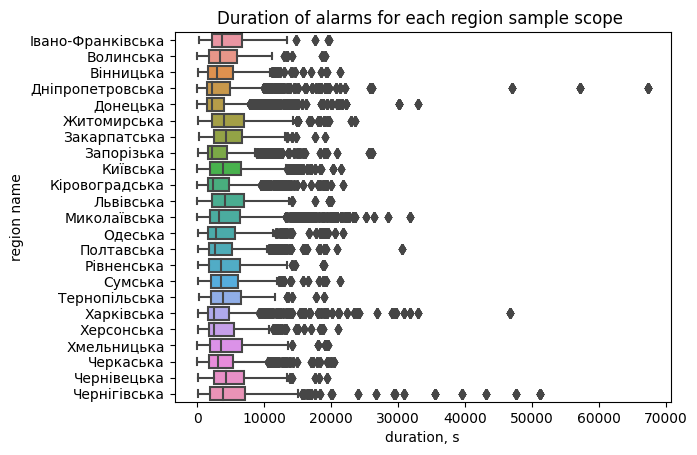

In [8]:
merged_df = merged_df.sort_values('region', ascending = True)
sns.boxplot(data = merged_df, x = 'duration_in_s', y = 'region')
plt.xlabel('duration, s')
plt.ylabel('region name')
plt.title('Duration of alarms for each region sample scope ')
plt.show()

### Show the correlation of temperature fluctiations and alarm duration in Mykolaiv region (using scatter plot)

In [9]:
mykolaiv_df = merged_df[merged_df['region'] == 'Миколаївська']
x_axis = mykolaiv_df['day_temp'].values
y_values = mykolaiv_df['duration_in_s'].values
y_axis = np.log10(y_values)

#### \*We took logarithm value of *the duration_in_s* indicator because the values without it are too large to be respentational 

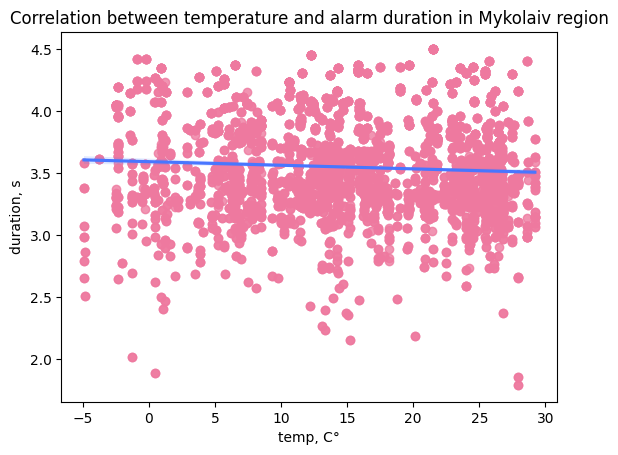

In [10]:
sns.regplot(x = x_axis, y = y_axis, scatter_kws={"color": "#EE799F"}, line_kws={"color": "#4876FF"})
plt.title('Correlation between temperature and alarm duration in Mykolaiv region')
plt.xlabel('temp, C°')
plt.ylabel('duration, s')
plt.show()

### Show the scope of the sample duration of alarms in the Kyiv region

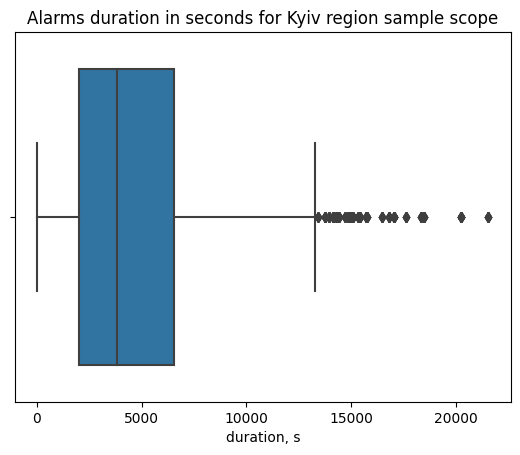

In [11]:
kyiv_df = merged_df[merged_df['region'] == 'Київська'] 

sns.boxplot(data = kyiv_df, x = 'duration_in_s')
plt.xlabel('duration, s')
plt.title('Alarms duration in seconds for Kyiv region sample scope')
plt.show()

#### Define a list of colors hex codes

In [12]:
color_list = ['#308014', '#71C671','#388E8E','#836FFF', '#EED2EE', '#EE82EE', '#CDBA96','#708090','#FA8072', '#800080',
             '#DB7093','#FF8000', '#3CB371', '#FFE4E1', '#8B475D', '#CD0000', '#7A67EE', '#71C671','#FFB5C5', '#EE9A00',
             '#B0E0E6','#40E0D0', '#EE3A8C' ]

### Create a bar plot to show the rating among all regions by the number of alarms in it over the whole researched period

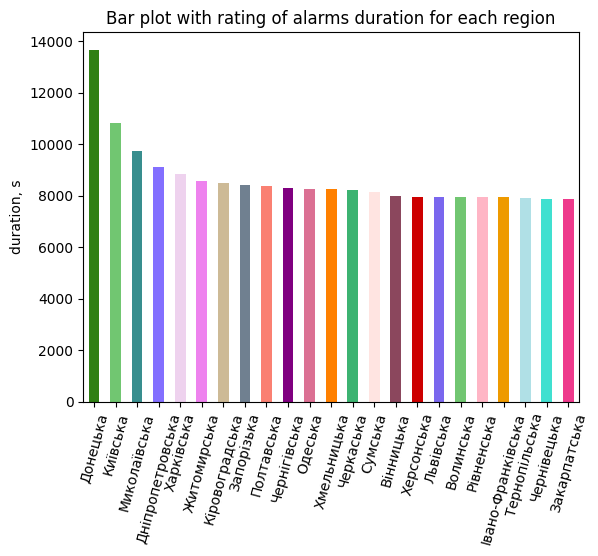

In [18]:
merged_df['region'].value_counts().plot(kind = 'bar', color = color_list) #бар плот с рейтингом по общей длительности тревог в каждом регионе
plt.ylabel('duration, s')
plt.xticks(rotation = 75)
plt.title('Bar plot with rating of alarms duration for each region')
plt.show()
